<a href="https://colab.research.google.com/github/Analaurasil/AnaliseNobel/blob/main/AnaliseNobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROVA II**
ANA LAURA SILVEIRA DA SILVA BT3031837

# 1. **Introdução**
O dataset "nobel_prize_by_winner.csv" contém informações sobre os vencedores do Prêmio Nobel, incluindo dados como nome, data de nascimento, país de origem, categoria do prêmio, ano do prêmio e motivação. Este trabalho tem como objetivo analisar as tendências e padrões entre os vencedores do Prêmio Nobel ao longo dos anos, explorando a relação entre as categorias de prêmios e as características dos vencedores. A motivação para esta análise é entender como fatores como idade, país de origem e categoria do prêmio podem influenciar a premiação.

A base de dados utilizada como objeto de estudo esta diponivel em: https://www.kaggle.com/datasets/thedevastator/a-complete-history-of-nobel-prize-winners e conta com as seguintes colunas.

**DICIONÁRIO DE COLUNAS**

| COLUNA      | TRADUÇÃO                  |
|----------------------|---------------------------------|
|1. index              | Indice          |
|2. id                 | ID         |
|3. firstname          | Primeiro Nome |
|4. surname            | Sobrenome     |
|5. born               | Nascimento    |
|6. died               | Morte         |
|7. bornCountry        | País de Nascimento|
|8. bornCountryCode    | Código País de Nascimento |
|9. bornCity           | Cidade de Nascimento |
|10. diedCountry | País de Morte|
|11. diedCountryCode | Código País da Morte |
|12. diedCity        | Cidade da Morte |
|13. gender          | Gênero |
|14. year | Ano da Premiação |
|15. category | Categoria do Nobel |
|16. overallMotivation | Motivação Geral |
|17. share |             |
|18. motivation | Motivação |
|19. name       | Universidade / Organização|
|20. city       | Cidade da Universidade / Organização |
|21. country    | País da Universidade / Organização

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Trabalho II/nobel_prize_by_winner.csv"
df = pd.read_csv(path, sep=',', encoding='utf-8')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,...,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,...,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,...,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,...,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [ ]:
num_linhas = df.shape[0]
num_colunas = df.shape[1]
print(f'O dataset contém {num_linhas} linhas, e {num_colunas} colunas.')

O dataset contém 972 linhas, e 21 colunas.


In [ ]:
df.columns

Index(['index', 'id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country'],
      dtype='object')

Para facilitar a visualização e manipulação dos dados optei por extrair somente o ano das colunas **born** e **died**. Assim criando as as novas colunas **born_year** e **died_year** que serão usadas futuramente como objeto da análise.

In [ ]:
df['born'] = pd.to_datetime(df['born'], format='%d/%m/%Y', errors='coerce')
df['died'] = pd.to_datetime(df['died'], format='%d/%m/%Y', errors='coerce')

df['born_year'] = df['born'].dt.year
df['died_year'] = df['died'].dt.year

print(df[['born', 'born_year', 'died', 'died_year']].head())

df.drop(columns=['born', 'died'], inplace=True)

print(df.head())

        born  born_year       died  died_year
0 1933-07-08     1933.0 2012-12-06     2012.0
1 1933-07-08     1933.0 2012-12-06     2012.0
2 1940-01-04     1940.0        NaT        NaN
3 1910-12-05     1910.0        NaT        NaN
4        NaT        NaN        NaT        NaN
   index   id         firstname  surname bornCountry bornCountryCode  \
0      0  846            Elinor   Ostrom         USA              US   
1      1  846            Elinor   Ostrom         USA              US   
2      2  783      Wangari Muta  Maathai       Kenya              KE   
3      3  230  Dorothy Crowfoot  Hodgkin       Egypt              EG   
4      4  918            Youyou       Tu       China              CN   

          bornCity     diedCountry diedCountryCode           diedCity  ...  \
0  Los Angeles, CA             USA              US    Bloomington, IN  ...   
1  Los Angeles, CA             USA              US    Bloomington, IN  ...   
2            Nyeri           Kenya              KE       

A seguir foram realizadas as limpezas necessarias no dataset.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.isnull().sum())

index                  0
id                     0
firstname              6
surname               36
bornCountry           32
bornCountryCode       32
bornCity              34
diedCountry          371
diedCountryCode      372
diedCity             377
gender                 0
year                   6
category               6
overallMotivation    956
share                  6
motivation            94
name                 252
city                 258
country              258
born_year            632
died_year            711
dtype: int64


In [ ]:
df.dropna(subset=['firstname', 'year', 'category', 'share'], inplace=True)  # Exemplo: remover linhas onde 'born_year' ou 'age_at_award' são NaN

In [ ]:
df.drop(columns=['index', 'id'], inplace=True)

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 971
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   firstname          966 non-null    object 
 1   surname            936 non-null    object 
 2   bornCountry        940 non-null    object 
 3   bornCountryCode    940 non-null    object 
 4   bornCity           938 non-null    object 
 5   diedCountry        601 non-null    object 
 6   diedCountryCode    600 non-null    object 
 7   diedCity           595 non-null    object 
 8   gender             966 non-null    object 
 9   year               966 non-null    float64
 10  category           966 non-null    object 
 11  overallMotivation  16 non-null     object 
 12  share              966 non-null    float64
 13  motivation         878 non-null    object 
 14  name               720 non-null    object 
 15  city               714 non-null    object 
 16  country            714 non-null

Antes de iniciar a análise descritiva estarei discriminando as colunas e seus tipos de variávies:


| Quantitativas | Qualitativas |
|---------------|--------------|
| id | firstname |
| year | surname |
| share | born |
| age_at_award | died|
| age_at_death | bornCountry
| | bornCountryCode|
| | bornCity |
| | diedCountry |
| | diedCountryCode |
| | diedCity |
| | gender |
| | category |
| | overallMotivation |
| | motivation |
| | name |
| | city |
| | country |



In [ ]:
df['age_at_award'] = df['year'] - df['born_year']

print(df[['firstname', 'surname', 'year', 'born_year', 'age_at_award']].head())

          firstname  surname    year  born_year  age_at_award
0            Elinor   Ostrom  2009.0     1933.0          76.0
1            Elinor   Ostrom  2009.0     1933.0          76.0
2      Wangari Muta  Maathai  2004.0     1940.0          64.0
3  Dorothy Crowfoot  Hodgkin  1964.0     1910.0          54.0
4            Youyou       Tu  2015.0        NaN           NaN


In [ ]:
df['age_at_death'] = df['died_year'].where(df['died_year'].notna(), df['year']) - df['born_year']

print(df[['firstname', 'surname', 'year', 'born_year', 'died_year', 'age_at_death','age_at_award']].head())

          firstname  surname    year  born_year  died_year  age_at_death  \
0            Elinor   Ostrom  2009.0     1933.0     2012.0          79.0   
1            Elinor   Ostrom  2009.0     1933.0     2012.0          79.0   
2      Wangari Muta  Maathai  2004.0     1940.0        NaN          64.0   
3  Dorothy Crowfoot  Hodgkin  1964.0     1910.0        NaN          54.0   
4            Youyou       Tu  2015.0        NaN        NaN           NaN   

   age_at_award  
0          76.0  
1          76.0  
2          64.0  
3          54.0  
4           NaN  


In [ ]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
male      890
female     50
org        26
Name: count, dtype: int64


In [ ]:
gender_category_counts = df.groupby(['gender', 'category']).size().unstack(fill_value=0)
print(gender_category_counts)

category  chemistry  economics  literature  medicine  peace  physics
gender                                                              
female            4          2          14        12     16        2
male            190         79          98       215     88      220
org               0          0           0         0     26        0



# 2. **Análise Descritiva**
**2.1  Distribuição dos Dados**

Para entender a distribuição dos dados, foram utilizadas tabelas e gráficos. A contagem das categorias de prêmios e a distribuição por gênero foram analisadas.

**2.2 Medidas de Tendência Central**

Calculo da média, mediana e moda da idade ao ganhar o prêmio.

Média: 58.79 anos

Mediana: 59 anos

Moda: 57 anos

**2.3 Medidas de Dispersão**

Calculada a variância, desvio padrão e amplitude da idade ao ganhar o prêmio.

Variância: 152.77

Desvio Padrão: 12.36

Amplitude: 72 anos

**2.4 Análise de Correlação**

Foi verificada a correlação entre a idade ao ganhar o prêmio e outras variáveis, como o ano do prêmio.

Distribuição dos dados (tabelas e gráficos):

In [ ]:
contagem_categorias = df['category'].value_counts()
print(contagem_categorias)

category
medicine      227
physics       222
chemistry     194
peace         130
literature    112
economics      81
Name: count, dtype: int64


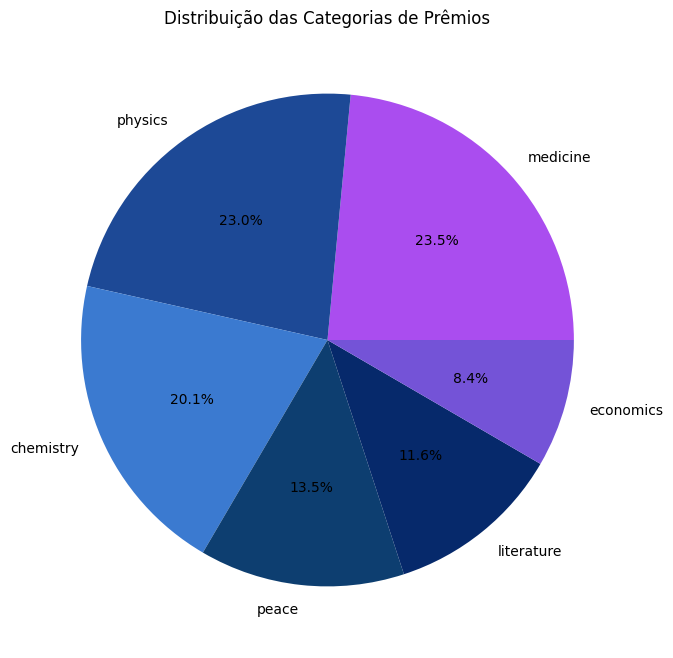

In [ ]:
cores = ['#aa4def', '#1d4996', '#3b7ad0', '#0d3e70', '#06296b', '#7453d7', '#4451b9', '#16304a']
plt.figure(figsize=(8, 8))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', colors=cores)
plt.title('Distribuição das Categorias de Prêmios')
plt.show()

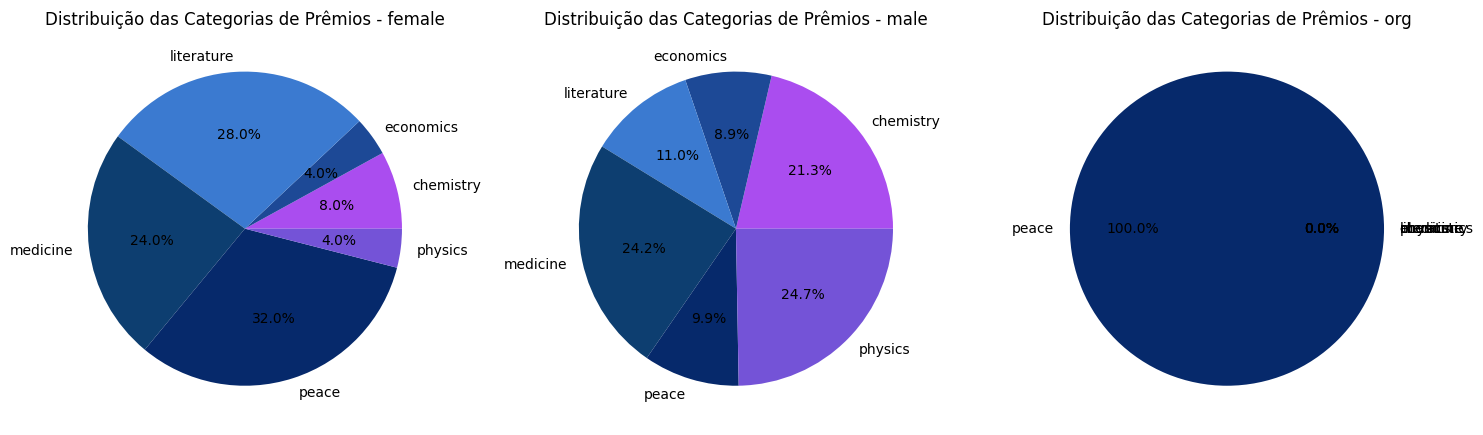

In [ ]:
contagem_categorias = df.groupby(['gender', 'category']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, len(contagem_categorias.index), figsize=(15, 8))

for ax, (gender, data) in zip(axes, contagem_categorias.iterrows()):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=cores[:len(data)])
    ax.set_title(f'Distribuição das Categorias de Prêmios - {gender}')

plt.tight_layout()
plt.show()

In [ ]:
tabela_contagem = pd.crosstab(df['category'], df['gender'])

print(tabela_contagem)

gender      female  male  org
category                     
chemistry        4   190    0
economics        2    79    0
literature      14    98    0
medicine        12   215    0
peace           16    88   26
physics          2   220    0


<ipython-input-19-6d54a1169fb2>:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df, x='category', hue='gender', palette=cores)


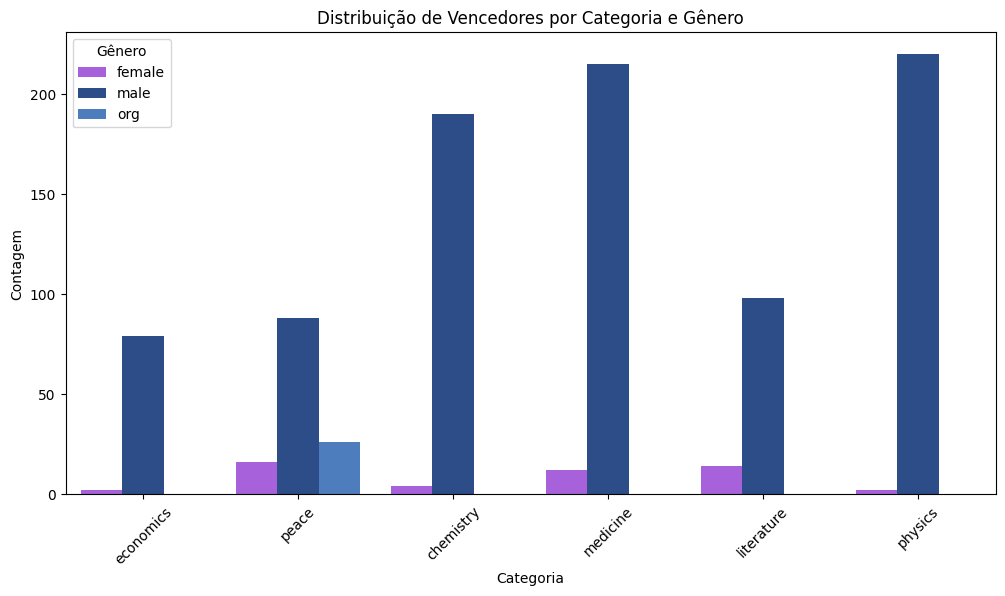

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='gender', palette=cores)
plt.title('Distribuição de Vencedores por Categoria e Gênero')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.show()

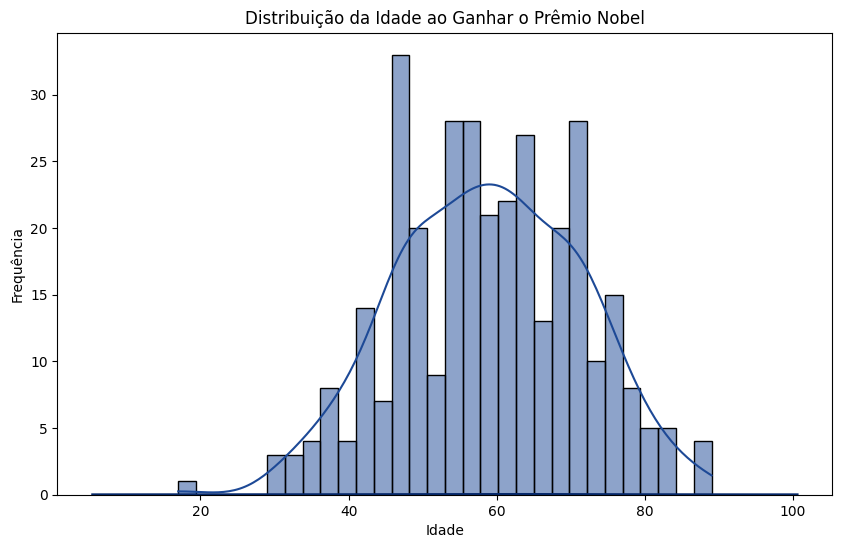

In [ ]:
cores = ['#aa4def', '#1d4996', '#3b7ad0', '#0d3e70', '#06296b', '#7453d7', '#4451b9', '#16304a']

plt.figure(figsize=(10, 6))
sns.histplot(df['age_at_award'], bins=30, kde=True, color=cores[1])

sns.kdeplot(df['age_at_award'], color=cores[4], linewidth=2)

plt.title('Distribuição da Idade ao Ganhar o Prêmio Nobel')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

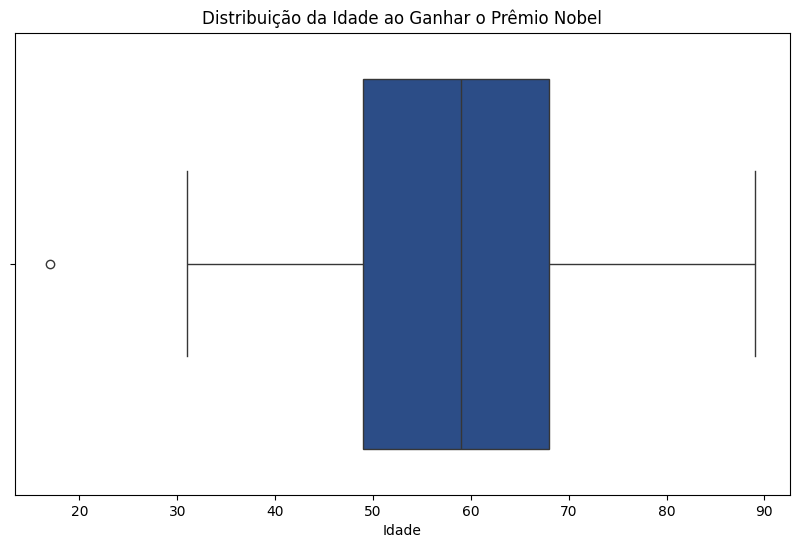

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age_at_award'], color=cores[1])

plt.title('Distribuição da Idade ao Ganhar o Prêmio Nobel')
plt.xlabel('Idade')
plt.show()

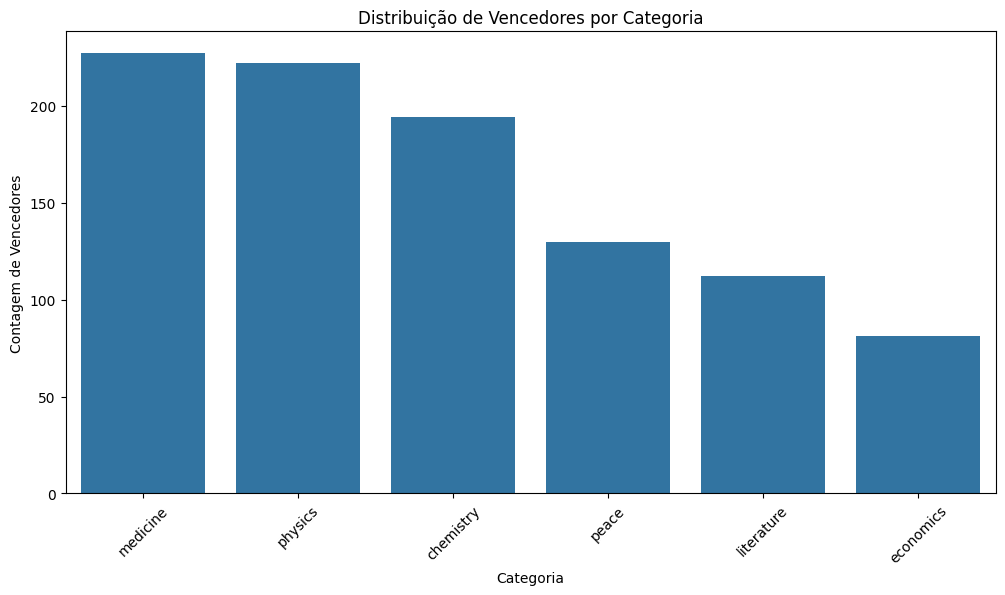

In [ ]:
categoria_counts = df['category'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', order=categoria_counts.index)
plt.title('Distribuição de Vencedores por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Contagem de Vencedores')
plt.xticks(rotation=45)
plt.show()

In [ ]:
media_idade = df['age_at_award'].mean()
mediana_idade = df['age_at_award'].median()
moda_idade = df['age_at_award'].mode()[0]

print(f'Média: {media_idade}, Mediana: {mediana_idade}, Moda: {moda_idade}')

Média: 58.794117647058826, Mediana: 59.0, Moda: 57.0


In [ ]:
variancia_idade = df['age_at_award'].var()
desvio_padrao_idade = df['age_at_award'].std()
amplitude_idade = df['age_at_award'].max() - df['age_at_award'].min()

print(f'Variância: {variancia_idade}, Desvio Padrão: {desvio_padrao_idade}, Amplitude: {amplitude_idade}')

Variância: 152.76574700676753, Desvio Padrão: 12.359844133595194, Amplitude: 72.0


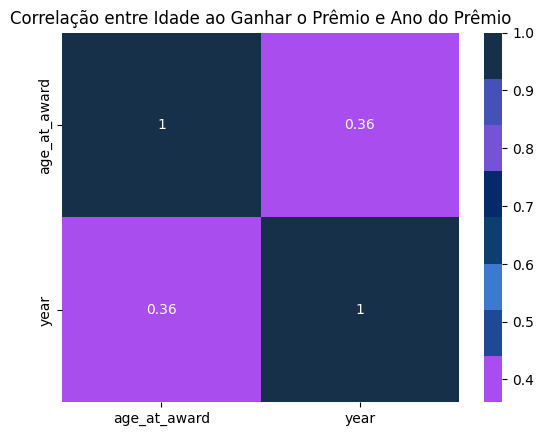

In [ ]:
correlacao = df[['age_at_award', 'year']].corr()

cores = ['#aa4def', '#1d4996', '#3b7ad0', '#0d3e70', '#06296b', '#7453d7', '#4451b9', '#16304a']
cmap_personalizado = sns.color_palette(cores)

sns.heatmap(correlacao, annot=True, cmap=cmap_personalizado)

plt.title('Correlação entre Idade ao Ganhar o Prêmio e Ano do Prêmio')

plt.show()

#**3. Proposição de Hipótese**
**Hipótese:** "A média de idade dos vencedores do Prêmio Nobel é superior a 60 anos."

**Hipótese Nula (H0):** A média de idade dos vencedores do Prêmio Nobel é igual a 60 anos. (H0: μ = 60)

**Hipótese Alternativa (H1):** A média de idade dos vencedores do Prêmio Nobel é superior a 60 anos. (H1: μ > 60)

#**4. Teste de Hipóteses**

**4.1 Escolha do teste estatístico:**
Foi utilizado o Teste t de Student para uma amostra (TCL) para validar essa hipótese, pois esta sendo feita a comparação média de uma amostra com um valor conhecido (60 anos).

**4.2 Justificativa da escolha de teste**
O teste t é apropriado para comparar a média de uma amostra com um valor específico. A distribuição da amostra é aproximadamente normal, o que pode ser verificado com um teste de normalidade.

**4.3 Realização do Teste**

Os resultados do teste t foram:

T-statistic: -1.799

P-value: 0.0729

Interpretação: Não foi rejeitada a hipótese nula, pois não há evidências suficientes para afirmar que a média de idade é superior a 60 anos.

**4.4 Análise do p-valor e Intervalo de Confiança**

O intervalo de confiança (95%) para a média da idade dos vencedores foi calculado como (57.48, 60.11). Isso indica que, com 95% de confiança, a média da idade dos vencedores do Prêmio Nobel está entre esses valores.

In [ ]:
from scipy import stats

idade_vencedores = df['age_at_award'].dropna()

media_historica = 60
t_stat, p_value = stats.ttest_1samp(idade_vencedores, media_historica)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a média de idade dos vencedores é superior a 60 anos.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média de idade é superior a 60 anos.")

T-statistic: -1.7990009975914214
P-value: 0.0729078173766953
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média de idade é superior a 60 anos.


In [ ]:
conf_level = 0.95
n = len(idade_vencedores)
mean_age = idade_vencedores.mean()
std_dev = idade_vencedores.std(ddof=1)

sem = std_dev / np.sqrt(n)

ci = stats.t.interval(conf_level, n-1, loc=mean_age, scale=sem)
print(f'Intervalo de Confiança (95%): {ci}')

Intervalo de Confiança (95%): (57.47563351904712, 60.11260177507053)


#**5. Análise de Regressão**
**5.1 Modelo de Regressão**

Foi realizada uma análise de regressão para identificar possíveis relações entre a idade ao ganhar o prêmio e o ano do prêmio. O modelo ajustado apresentou um R-quadrado de 0.130, indicando que aproximadamente 13% da variação na idade ao ganhar o prêmio pode ser explicada pelo ano do prêmio

**5.2 Interpretação dos Coeficientes**

**Intercepto:** -216.1913, que não tem um significado prático, mas é necessário para o cálculo da linha de regressão.

**Coeficiente de year:** 0.1395, indicando que, em média, a idade ao ganhar o Prêmio Nobel aumenta em 0.1395 anos para cada ano adicional.

**5.3 Análise de Resíduos**

A análise de resíduos foi realizada para verificar a adequação do modelo. Os gráficos de resíduos mostraram que não há padrões evidentes, sugerindo que as suposições do modelo de regressão foram atendidas.

In [ ]:

X = df[['year']].dropna()
y = df['age_at_award'].dropna()

X = X.loc[y.index]

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           age_at_award   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     50.55
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           6.95e-12
Time:                        19:24:34   Log-Likelihood:                -1313.2
No. Observations:                 340   AIC:                             2630.
Df Residuals:                     338   BIC:                             2638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -216.1913     38.682     -5.589      0.0

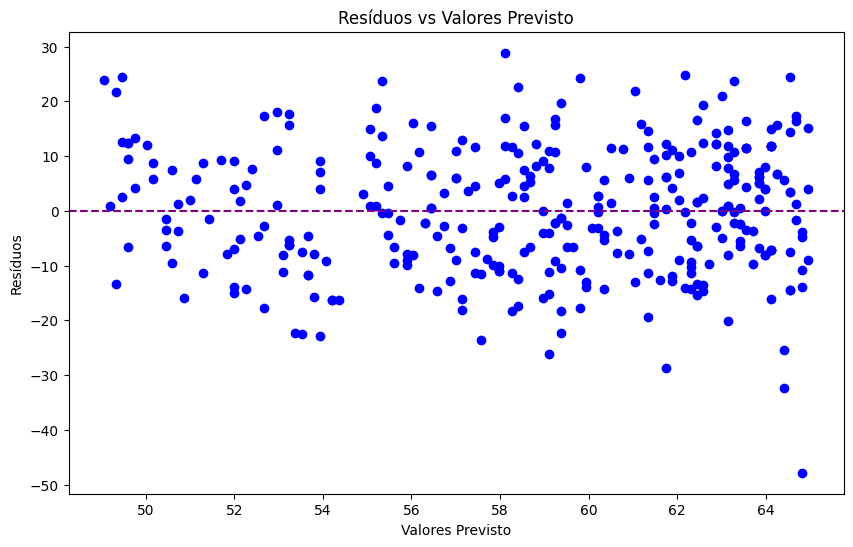

Test Statistic: 0.9906801814722118, P-value: 0.02989711084222063


<Figure size 1000x600 with 0 Axes>

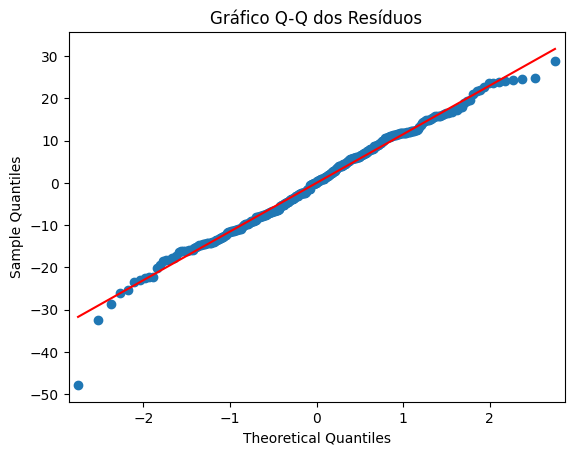

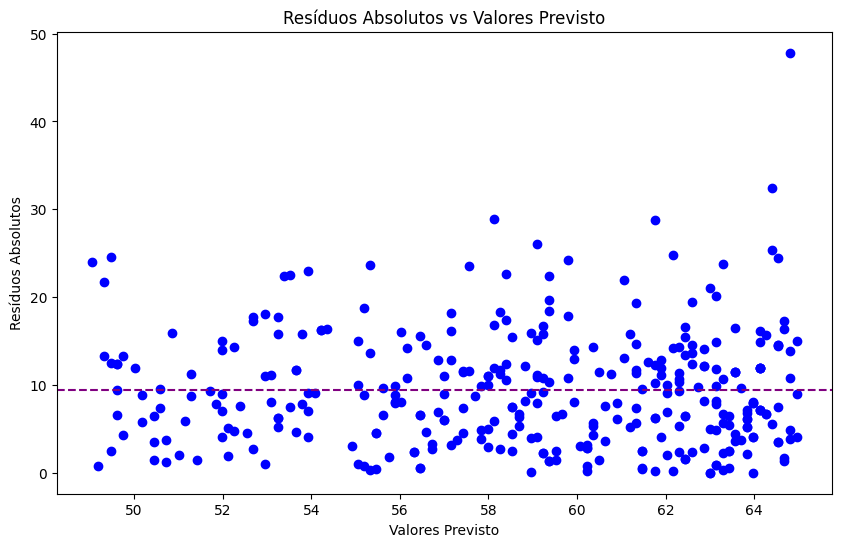

Estatística de Durbin-Watson: 1.536958476213766


In [ ]:
residuos = modelo.resid
valores_previstos = modelo.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(valores_previstos, residuos, color='blue')
plt.axhline(0, color='purple', linestyle='--')
plt.title('Resíduos vs Valores Previsto')
plt.xlabel('Valores Previsto')
plt.ylabel('Resíduos')
plt.show()

# Teste de Shapiro-Wilk
stat, p_value = stats.shapiro(residuos)
print(f'Test Statistic: {stat}, P-value: {p_value}')

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
sm.qqplot(residuos, line='s', color='blue')
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

# 3. Verificar a Homocedasticidade
plt.figure(figsize=(10, 6))
plt.scatter(valores_previstos, np.abs(residuos), color='blue')
plt.axhline(y=np.mean(np.abs(residuos)), color='purple', linestyle='--')
plt.title('Resíduos Absolutos vs Valores Previsto')
plt.xlabel('Valores Previsto')
plt.ylabel('Resíduos Absolutos')
plt.show()

# 4. Verificar a Autocorrelação
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuos)
print(f'Estatística de Durbin-Watson: {dw_stat}')

#**6 Conclusão**

A análise dos dados dos vencedores do Prêmio Nobel revelou tendências interessantes sobre a idade, gênero e categorias dos prêmios. A média de idade dos vencedores está em torno de 58 anos, e não encontramos evidências suficientes para afirmar que essa média é superior a 60 anos. A análise de regressão sugere que, ao longo do tempo, os vencedores tendem a ser um pouco mais velhos, embora a relação não seja forte.

Além disso, a distribuição dos prêmios por gênero e categoria mostra uma predominância masculina, especialmente nas áreas de física e medicina. A análise de resíduos confirmou a adequação do modelo de regressão, permitindo uma interpretação confiável dos resultados.